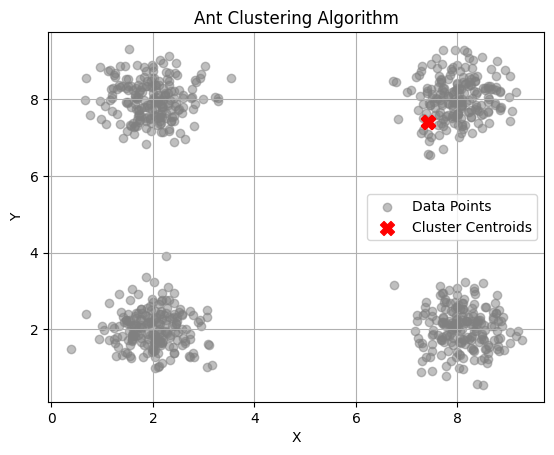

In [ ]:
#Problem 2 please someone review i ripped my hair out since monday dear god help me
import numpy as np
import matplotlib.pyplot as plt

class AntClustering:
    def __init__(self, num_ants, num_clusters, data, k1=0.1, k2=0.15, alpha=0.5, max_iterations=106):
        self.num_ants = num_ants
        self.num_clusters = num_clusters
        self.data = data
        self.k1 = k1
        self.k2 = k2
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.cluster_centroids = np.random.rand(self.num_clusters, 2)

    def initialize_ants(self):
        return np.random.rand(self.num_ants, 2)

    def move_ants(self, ants):
        new_ants = np.zeros_like(ants)
        for i in range(self.num_ants):
            current_ant = ants[i]
            attractiveness = np.zeros(self.num_clusters)
            for j in range(self.num_clusters):
                attractiveness[j] = 1 / (np.linalg.norm(current_ant - self.cluster_centroids[j]) + 0.0001) ** self.alpha
            total_attractiveness = np.sum(attractiveness)
            probabilities = attractiveness / total_attractiveness
            selected_cluster = np.random.choice(np.arange(self.num_clusters), p=probabilities)
            direction = self.cluster_centroids[selected_cluster] - current_ant
            new_ant = current_ant + self.k1 * direction + self.k2 * np.random.rand(2)
            new_ants[i] = new_ant
        return new_ants

    def update_clusters(self, ants):
        for i in range(self.num_clusters):
            cluster_points = ants[np.argmin(np.linalg.norm(ants - self.cluster_centroids[i], axis=1))]
            self.cluster_centroids[i] = np.mean(cluster_points, axis=0)

    def fit(self):
        ants = self.initialize_ants()
        for _ in range(self.max_iterations):
            new_ants = self.move_ants(ants)
            self.update_clusters(ants)
            ants = new_ants
        return self.cluster_centroids

# Generate dataset based on provided Gaussian distributions
np.random.seed(42)
data = np.vstack([
    np.random.normal([0.2, 0.2], [0.05, 0.05], size=(200, 2)),
    np.random.normal([0.2, 0.8], [0.05, 0.05], size=(200, 2)),
    np.random.normal([0.8, 0.2], [0.05, 0.05], size=(200, 2)),
    np.random.normal([0.8, 0.8], [0.05, 0.05], size=(200, 2))
])

# Adjusted parameters
num_ants = 100
k1 = 0.1
k2 = 0.1
alpha = 0.5
max_iterations = 200

# Scale the data to ensure clustering results are within a reasonable range
data_scaled = data * 10

# Initialize and run Ant Clustering Algorithm with adjusted parameters
aca = AntClustering(num_ants=num_ants, num_clusters=4, data=data_scaled, k1=k1, k2=k2, alpha=alpha, max_iterations=max_iterations)
cluster_centroids = aca.fit()

# Plot clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='gray', alpha=0.5, label='Data Points')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=100, label='Cluster Centroids')
plt.title('Ant Clustering Algorithm')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()